In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
data=pd.read_csv("liedetector.csv")
data.head(20)

,X1,X2,X3,X4,X5,X6
0,P_001,3.62160,8.6661,-2.80730,-0.44699,0
1,P_002,4.54590,8.1674,-2.45860,-1.46210,0
2,P_003,3.86600,-2.6383,1.92420,0.10645,0
3,P_004,3.45660,9.5228,-4.01120,-3.59440,0
4,P_005,0.23230,-4.4552,4.57180,-0.98880,0
5,P_006,4.36840,9.6718,-3.96060,-3.16250,0
6,P_007,3.59120,3.0129,0.72888,0.56421,0
7,P_008,2.09220,-6.8100,8.46360,-0.60216,0
8,P_009,3.20320,5.7588,-0.75345,-0.61251,0
9,P_010,1.53560,9.1772,-2.27180,-0.73535,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1372 non-null   object 
 1   X2      1372 non-null   float64
 2   X3      1372 non-null   float64
 3   X4      1372 non-null   float64
 4   X5      1372 non-null   float64
 5   X6      1372 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


In [5]:
data = data.drop('X1', axis=1)
data

,X2,X3,X4,X5,X6
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.23230,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,0
1368,-1.38870,-4.87730,6.4774,0.34179,0
1369,-3.75030,-13.45860,17.5932,-2.77710,0
1370,-3.56370,-8.38270,12.3930,-1.28230,0


In [7]:
array = data.values
X = array[:,0:3] # select all rows and first 8 columns which are the attributes
Y = array[:,4]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

In [8]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X,Y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [9]:
model.score(X,Y)

0.8483965014577259

In [11]:
# predict probabilities
probs = model.predict_proba(X)

# keep probabilities for the positive outcome only

probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(Y, probs)
print('AUC: %.3f' % auc)



AUC: 0.851


In [12]:
ytrain_predict = model.predict(X)
confusion_matrix(Y, ytrain_predict)


array([[681, 133],
       [ 75, 483]])

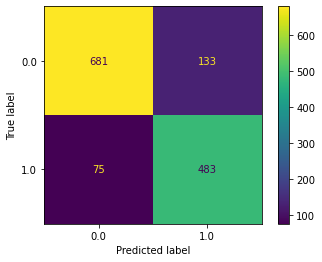

In [13]:
plot_confusion_matrix(model,X,Y);

In [18]:
model = LogisticRegression()

model.fit(X, Y) #best fit s curve

y_predict = model.predict(X)

model_score = model.score(X, y_predict)

print(model_score)

print(metrics.confusion_matrix(Y, y_predict))

print(metrics.classification_report(Y, y_predict))


1.0
[[681 133]
 [ 75 483]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       814
         1.0       0.78      0.87      0.82       558

    accuracy                           0.85      1372
   macro avg       0.84      0.85      0.85      1372
weighted avg       0.85      0.85      0.85      1372



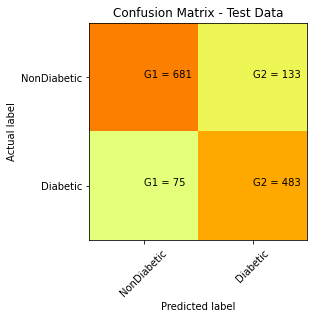

In [17]:
cm = metrics.confusion_matrix(Y, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NonDiabetic', 'Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()